## Problem Statement 

You are given a dataset ("data.h5") containing: - a training set of m_train images labeled as cat (y=1) or non-cat (y=0) - a test set of m_test images labeled as cat or non-cat - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [10]:
print(train_set_x_orig.shape)
train_set_x_orig[0][0:2]

(209, 64, 64, 3)


array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        [25, 35, 62],
        [27, 36, 64],
        [28, 38, 67],
        [30, 41, 69],
        [31, 43, 73],
        [32, 47, 76],
        [34, 49, 79],
        [35, 50, 82],
        [36, 51, 82],
        [35, 50, 81],
        [34, 49, 79],
        [33, 48, 79],
        [33, 48, 79],
        [32, 47, 78],
        [31, 46, 76],
        [30, 44, 75],
        [29, 44, 75],
        [29, 44, 75],
        [27, 44, 74],
        [27, 42, 73],
        [25, 41, 71],
        [23, 40, 72],
        [21, 41, 73],
        [21, 42, 74],
        [21, 41, 74],
        [20, 40, 73],
        [20, 39, 72],
        [19, 39, 72],
        [18, 38, 71],
        [16, 38, 70],
        [14, 37, 69],
        [12, 37, 68],
        [11, 36, 67],
        [ 9, 36, 66],
        [ 7, 34, 64],
        [ 7, 35, 66],
        [ 4, 36, 69],
        [ 3, 36, 69],
        [ 2, 34, 65],
        [ 2, 34, 65],
        [ 1, 35, 67],
        [ 1, 34, 67],
        [ 

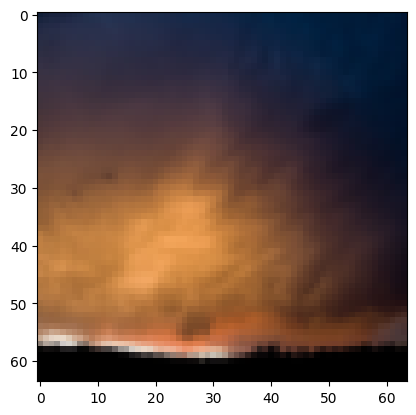

y = 0, it's a 'non-cat' picture.


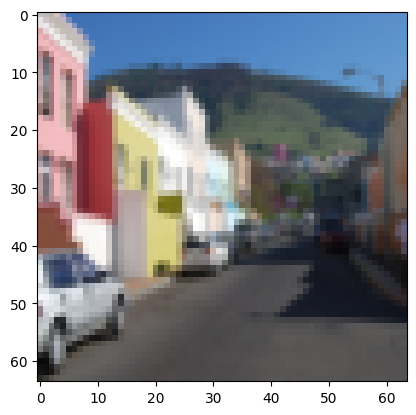

y = 0, it's a 'non-cat' picture.


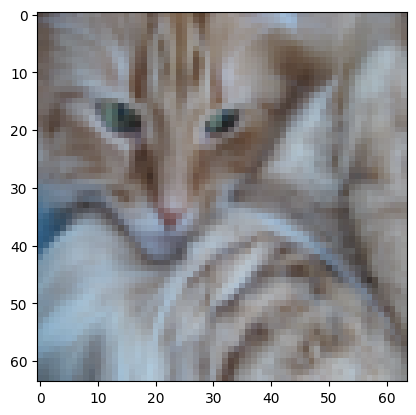

y = 1, it's a 'cat' picture.


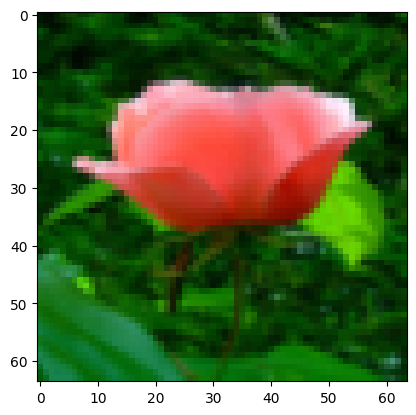

y = 0, it's a 'non-cat' picture.


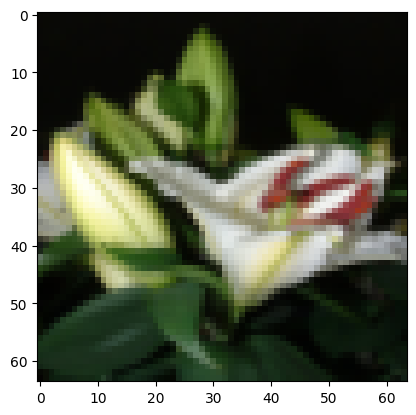

y = 0, it's a 'non-cat' picture.


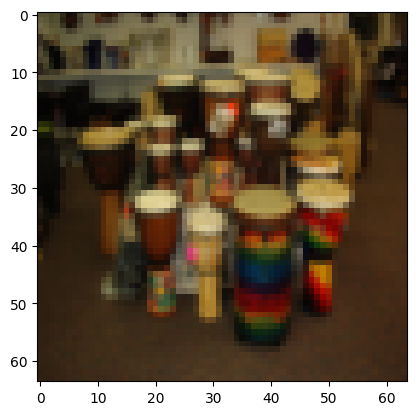

y = 0, it's a 'non-cat' picture.


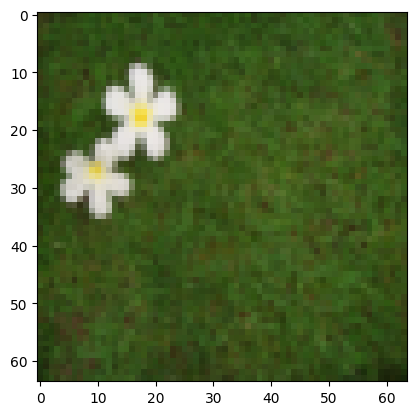

y = 0, it's a 'non-cat' picture.


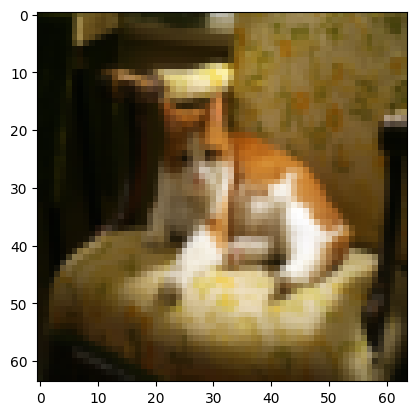

y = 1, it's a 'cat' picture.


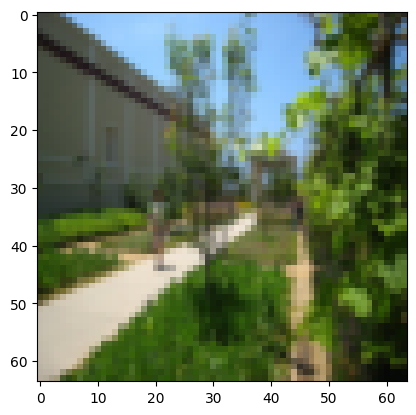

y = 0, it's a 'non-cat' picture.


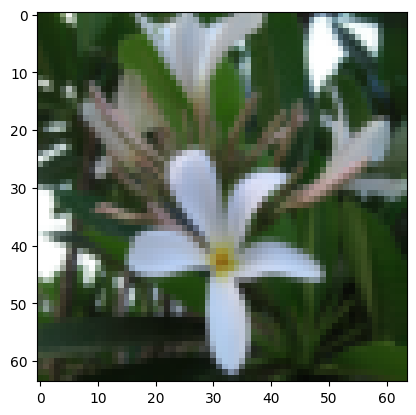

y = 0, it's a 'non-cat' picture.


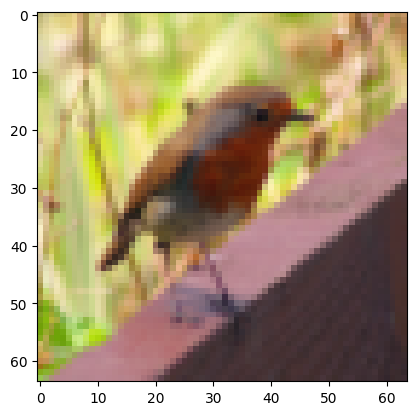

y = 0, it's a 'non-cat' picture.


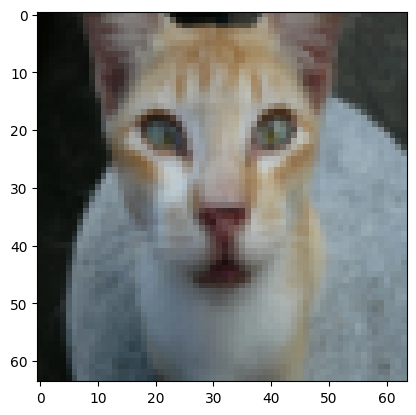

y = 1, it's a 'cat' picture.


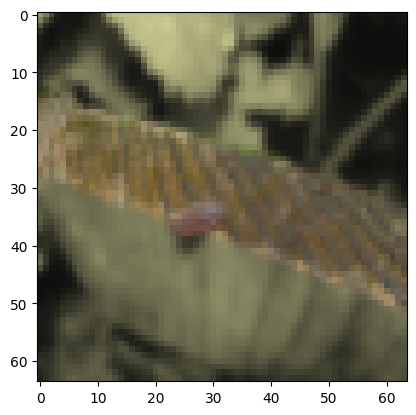

y = 0, it's a 'non-cat' picture.


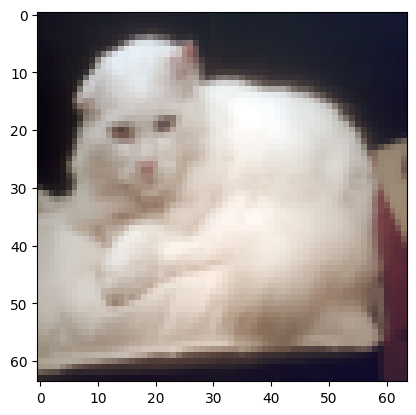

y = 1, it's a 'cat' picture.


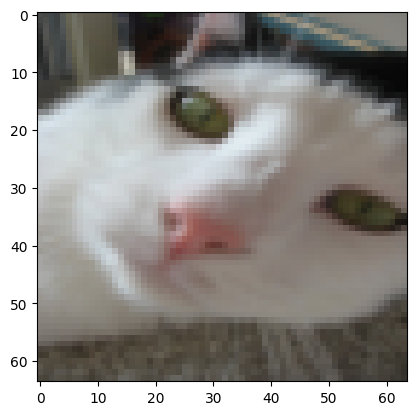

y = 1, it's a 'cat' picture.


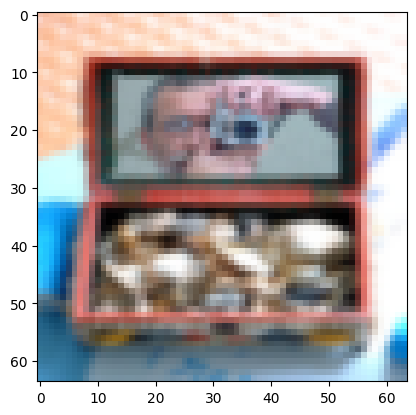

y = 0, it's a 'non-cat' picture.


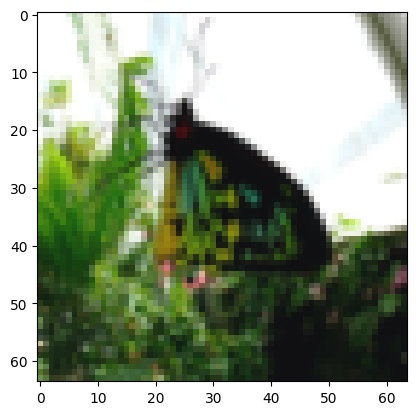

y = 0, it's a 'non-cat' picture.


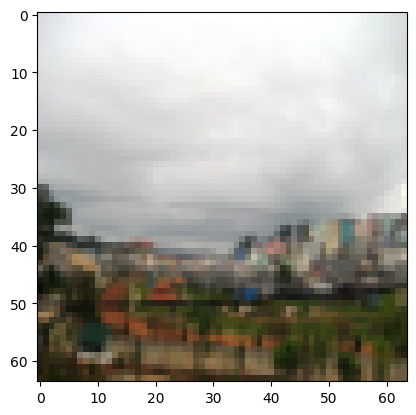

y = 0, it's a 'non-cat' picture.


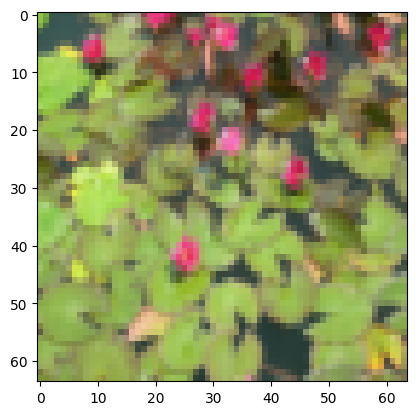

y = 0, it's a 'non-cat' picture.


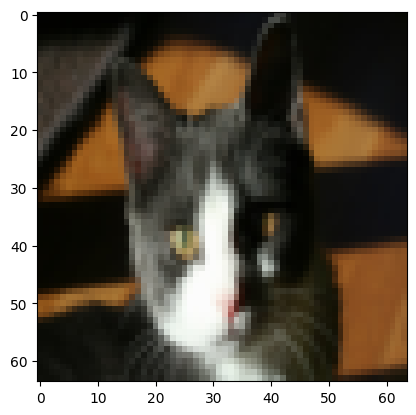

y = 1, it's a 'cat' picture.


In [4]:
for i in range(20):
    plt.imshow(train_set_x_orig[i])
    plt.show()
    print ("y = " + str(train_set_y[0, i]) + ", it's a '" + classes[np.squeeze(train_set_y[:, i])].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

**Exercise:** Find the values for: - m_train (number of training examples) - m_test (number of test examples) - num_px (= height = width of a training image) Remember that train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access m_train by writing train_set_x_orig.shape[0].

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Number of training examples: " + str(m_train))
print("Number of testing examplles: " + str(m_test))
print("Height/Width of each image: " + str(num_px))

print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))


Number of training examples: 209
Number of testing examplles: 50
Height/Width of each image: 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [15]:
print(len(train_set_x_orig[0][0]))
train_set_x_orig[0][0]

64


array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        ...,
        [ 1, 28, 57],
        [ 1, 26, 56],
        [ 1, 22, 51]],

       [[25, 36, 62],
        [28, 38, 64],
        [30, 40, 67],
        ...,
        [ 1, 27, 56],
        [ 1, 25, 55],
        [ 2, 21, 51]],

       [[32, 40, 67],
        [34, 42, 69],
        [35, 42, 70],
        ...,
        [ 1, 25, 55],
        [ 0, 24, 54],
        [ 1, 21, 51]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px 
 num_px 
 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

Exercise: Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px 
 num_px 
 3, 1).

In [17]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],test_set_x_orig.shape[0])

In [20]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


In [27]:
train_set_x_flatten[0:10,0]

array([17, 71, 49, 38, 70, 40, 26, 61, 36,  6], dtype=uint8)

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let's standardize our dataset.

In [28]:
train_set_x_normalized = train_set_x_flatten/255
test_set_x_normalized = test_set_x_flatten/255

### Understand the general architecture of the algorithm and build them
The main steps for building a Neural Network are:

1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
        a. Calculate current loss (forward propagation)

        b. Calculate current gradient (backward propagation)
        
        c. Update parameters (gradient descent)
        
        d. You often build 1-3 separately and integrate them into one function we call model().

#### Build a Signmoid function:
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>s</mi>
  <mi>i</mi>
  <mi>g</mi>
  <mi>m</mi>
  <mi>o</mi>
  <mi>i</mi>
  <mi>d</mi>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>w</mi>
    <mi>T</mi>
  </msup>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mn>1</mn>
      <mo>+</mo>
      <msup>
        <mi>e</mi>
        <mrow data-mjx-texclass="ORD">
          <mo>&#x2212;</mo>
          <mo stretchy="false">(</mo>
          <msup>
            <mi>w</mi>
            <mi>T</mi>
          </msup>
          <mi>x</mi>
          <mo>+</mo>
          <mi>b</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </msup>
    </mrow>
  </mfrac>
</math>


In [29]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s


In [41]:
print("Signmod([0,3]) = " + str(sigmoid(np.array([0,0.00033333,7,6.7]))))

Signmod([0,3]) = [0.5        0.50008333 0.99908895 0.9987706 ]


#### Initialize the parameters

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Reshape data for Conv2D layer (if using convolutional layers)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32, 10), output.shape=(32, 10)